In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
df = pd.read_csv('911.csv')

In [61]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Category,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


In [49]:
#top 10 zipcodes where calls originated
df['zip'].value_counts().head(10)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

In [50]:
#top 10 towns where calls originated
df['twp'].value_counts().head(10)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: twp, dtype: int64

In [51]:
#how many different titles are there
df['title'].nunique()

110

In [52]:
df['title'].head(20) #we will group the titles based on their categories 

0          EMS: BACK PAINS/INJURY
1         EMS: DIABETIC EMERGENCY
2             Fire: GAS-ODOR/LEAK
3          EMS: CARDIAC EMERGENCY
4                  EMS: DIZZINESS
5                EMS: HEAD INJURY
6            EMS: NAUSEA/VOMITING
7      EMS: RESPIRATORY EMERGENCY
8           EMS: SYNCOPAL EPISODE
9     Traffic: VEHICLE ACCIDENT -
10    Traffic: VEHICLE ACCIDENT -
11    Traffic: VEHICLE ACCIDENT -
12    Traffic: VEHICLE ACCIDENT -
13    Traffic: VEHICLE ACCIDENT -
14    Traffic: VEHICLE ACCIDENT -
15    Traffic: VEHICLE ACCIDENT -
16     EMS: RESPIRATORY EMERGENCY
17                 EMS: DIZZINESS
18          EMS: VEHICLE ACCIDENT
19    Traffic: DISABLED VEHICLE -
Name: title, dtype: object

In [53]:
x = df['title'].iloc[0]

x.split(':')[0]

'EMS'

In [54]:
df['Category'] = df['title'].apply(lambda title: title.split(':')[0])

df['Category'] #titles have been split by Category into a new column

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Category, Length: 99492, dtype: object

In [55]:
df['Category'].value_counts() #Categories arranged in asc order

EMS        48877
Traffic    35695
Fire       14920
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

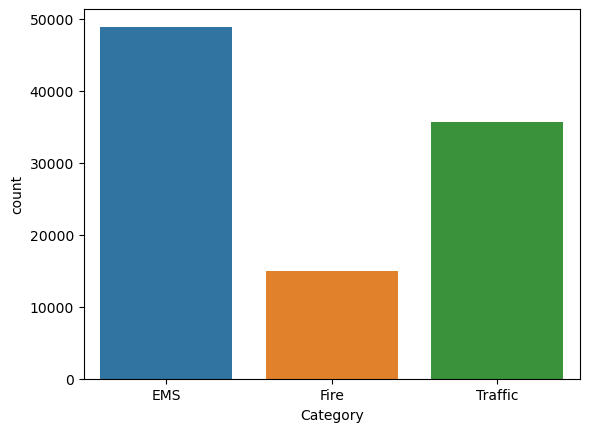

In [56]:
sns.countplot(x='Category', data = df)
# show the category count in a graph using seaborn

In [57]:
type(df['timeStamp'].iloc[0])
#timestamp data is in string, convert to DateTime to clean column

str

In [58]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])
#timestamp data now DateTime type

pandas._libs.tslibs.timestamps.Timestamp

In [59]:
#making 3 new columns(hour, month & day of week)
#so data can better analysed in the future

df['Hour'] =  df['timeStamp'].apply(lambda time: time.hour)
df['Month'] =  df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] =  df['timeStamp'].apply(lambda time: time.dayofweek)

In [60]:
#assigning day of week columns to actual days instead of numbers
daymap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(daymap)

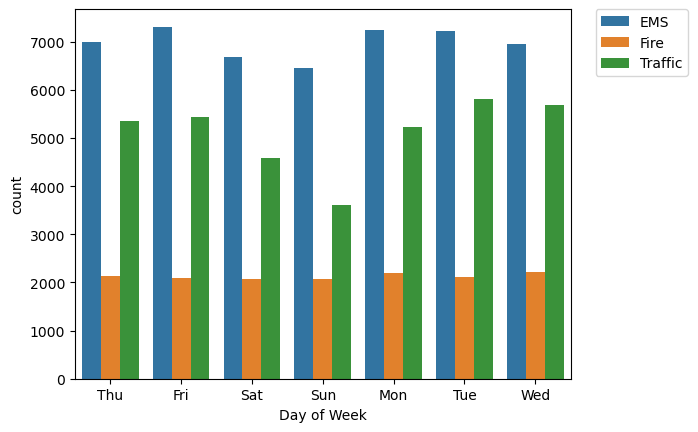

In [65]:
#creating a countplot split by categories using seaborn
sns.countplot(x='Day of Week', data = df,hue = 'Category')
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0)

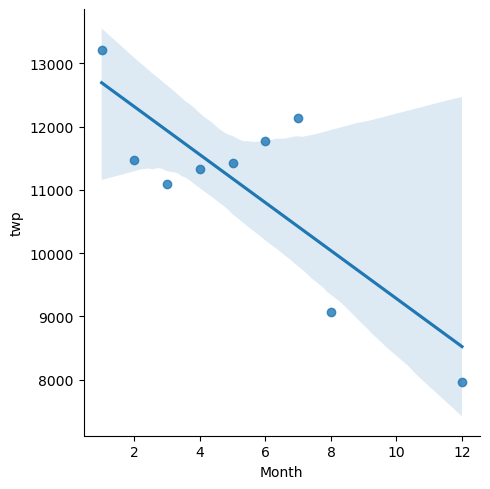

In [67]:
#there are months missing from the data,
#we can use a regression line to estimate the missing data points
#shaded area shows error range

GroupMonth = df.groupby('Month').count()
sns.lmplot(x='Month',y='twp',data=GroupMonth.reset_index())

In [68]:
#simplify timestamp column to make a date column
#can group data by date in the future
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

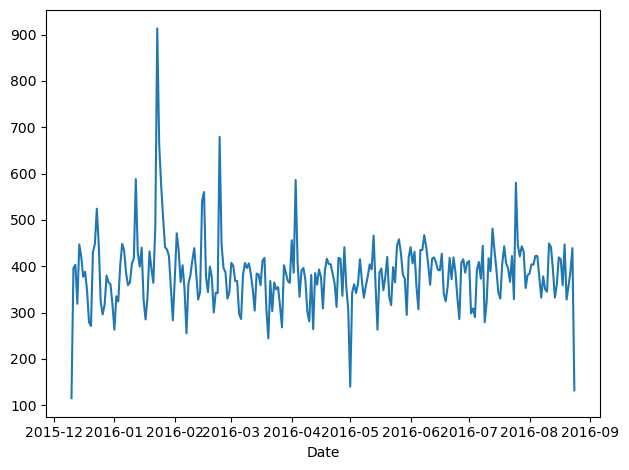

In [69]:
#plotting number of calls based on dates
df.groupby('Date').count()['lat'].plot()
#df[df['Category']=='Fire'].groupby('Date').count()['lat'].plot()
#able to group by dates & a category
plt.tight_layout()